In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# 读取附件1中的数据
data = pd.read_csv('./Datasets/附件1\M101.csv')

# 数据预处理
# 处理缺失值
data.fillna(0, inplace=True)

In [3]:
# 探索性数据分析（EDA）
# 统计各个装置故障字段的情况
fault_columns = ['物料推送装置故障1001', '物料检测装置故障2001', '填装装置检测故障4001', 
                 '填装装置定位故障4002', '填装装置填装故障4003', '加盖装置定位故障5001', 
                 '加盖装置加盖故障5002', '拧盖装置定位故障6001', '拧盖装置拧盖故障6002']

for column in fault_columns:
    print(f"故障{column}统计情况：")
    print(data[column].value_counts())

故障物料推送装置故障1001统计情况：
物料推送装置故障1001
0       632235
1001      4274
Name: count, dtype: int64
故障物料检测装置故障2001统计情况：
物料检测装置故障2001
0       636005
2001       504
Name: count, dtype: int64
故障填装装置检测故障4001统计情况：
填装装置检测故障4001
0       634998
4001      1511
Name: count, dtype: int64
故障填装装置定位故障4002统计情况：
填装装置定位故障4002
0       633576
4002      2933
Name: count, dtype: int64
故障填装装置填装故障4003统计情况：
填装装置填装故障4003
0       633797
4003      2712
Name: count, dtype: int64
故障加盖装置定位故障5001统计情况：
加盖装置定位故障5001
0       633964
5001      2545
Name: count, dtype: int64
故障加盖装置加盖故障5002统计情况：
加盖装置加盖故障5002
0       634300
5002      2209
Name: count, dtype: int64
故障拧盖装置定位故障6001统计情况：
拧盖装置定位故障6001
0       634480
6001      2029
Name: count, dtype: int64
故障拧盖装置拧盖故障6002统计情况：
拧盖装置拧盖故障6002
0       633848
6002      2661
Name: count, dtype: int64


In [4]:
# 特征工程
# 计算故障率
data['故障总数'] = data[fault_columns].sum(axis=1)
data['故障率'] = data['故障总数'] / len(fault_columns)

In [6]:
data['故障总数'].value_counts()

故障总数
0       615131
1001      4274
4002      2933
4003      2712
6002      2661
5001      2545
5002      2209
6001      2029
4001      1511
2001       504
Name: count, dtype: int64

In [7]:
data['故障率'].value_counts()

故障率
0.000000      615131
111.222222      4274
444.666667      2933
444.777778      2712
666.888889      2661
555.666667      2545
555.777778      2209
666.777778      2029
444.555556      1511
222.333333       504
Name: count, dtype: int64

In [5]:
# 模型建立
# 使用ARIMA模型进行时间序列预测
# 这里以填装装置故障4003为例
train_data = data['填装装置填装故障4003'].values
model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()

In [6]:
# 实时报警系统搭建
# 判断是否需要报警
# 假设设定阈值为0.5，超过阈值则触发报警
threshold = 0.5
if model_fit.forecast()[0] > threshold:
    print("填装装置故障4003超过阈值，触发报警！")
else:
    print("填装装置故障4003未超过阈值，不触发报警。")

填装装置故障4003未超过阈值，不触发报警。


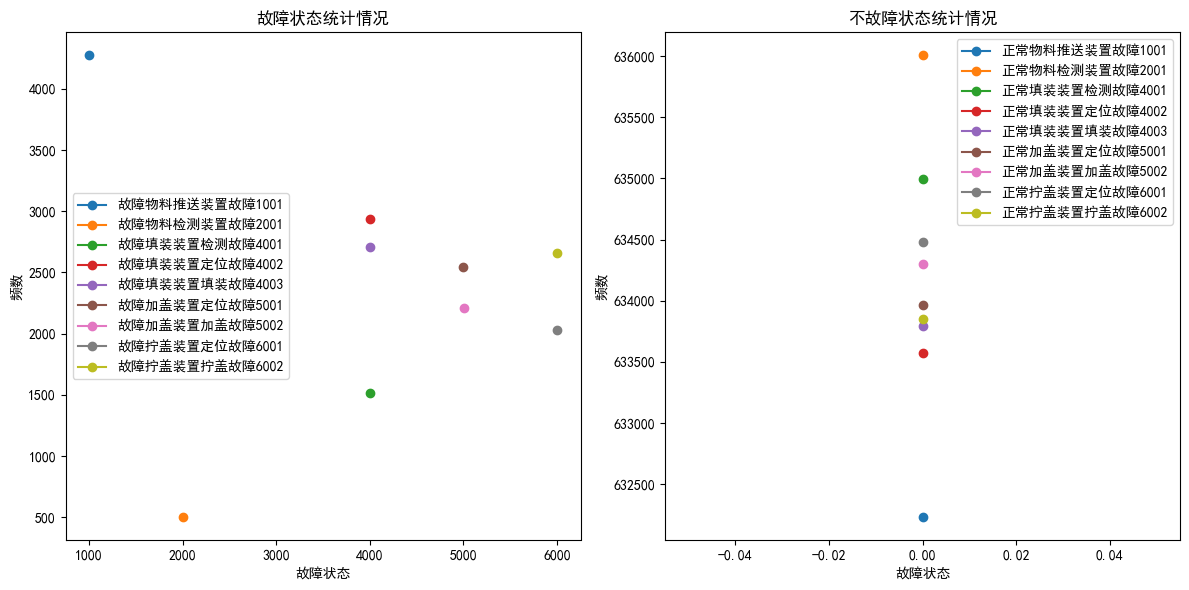

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei' 

# 创建画布
plt.figure(figsize=(12, 6))

# 绘制故障状态的折线图
plt.subplot(1, 2, 1)
for column in fault_columns:
    fault_counts = data[data[column] != 0][column].value_counts().sort_index()
    plt.plot(fault_counts.index, fault_counts.values, marker='o', label=f"故障{column}")
plt.title("故障状态统计情况")
plt.xlabel("故障状态")
plt.ylabel("频数")
plt.legend()

# 绘制不故障状态的折线图
plt.subplot(1, 2, 2)
for column in fault_columns:
    normal_counts = data[data[column] == 0][column].value_counts().sort_index()
    plt.plot(normal_counts.index, normal_counts.values, marker='o', label=f"正常{column}")
plt.title("不故障状态统计情况")
plt.xlabel("故障状态")
plt.ylabel("频数")
plt.legend()

plt.tight_layout()
plt.show()


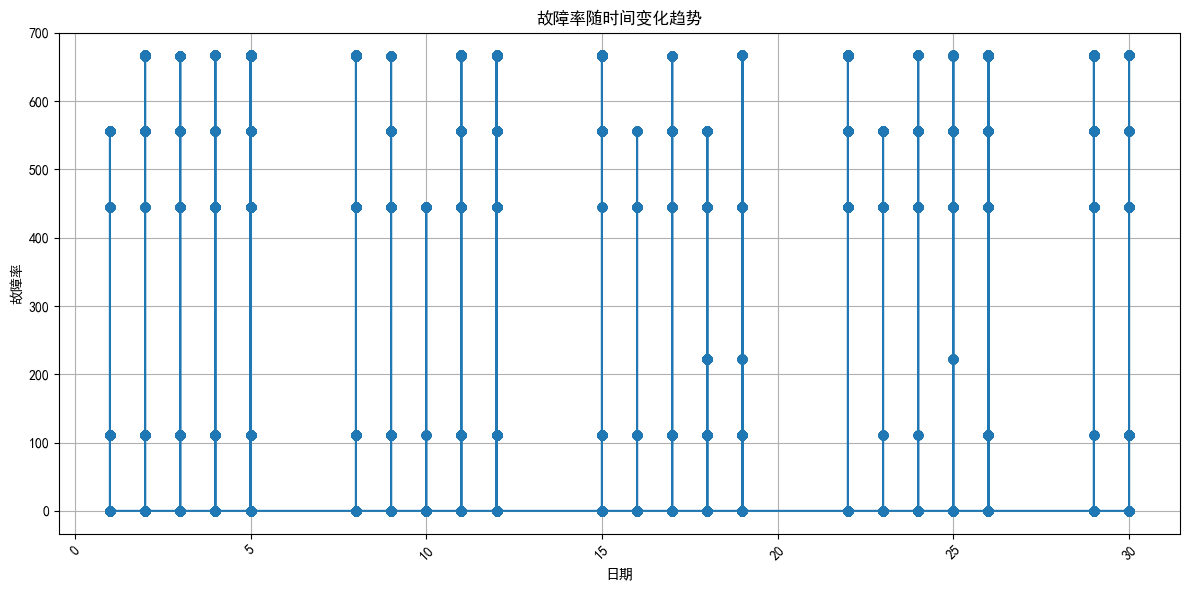

In [8]:
# 绘制故障率的时间序列图
plt.figure(figsize=(12, 6))
plt.plot(data['日期'], data['故障率'], marker='o', linestyle='-')
plt.title("故障率随时间变化趋势")
plt.xlabel("日期")
plt.ylabel("故障率")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

# 加载附件一中的数据
data1 = pd.read_csv('./Datasets/附件1\M101.csv')

# 假设使用之前建立的ARIMA模型进行故障检测，threshold是阈值
threshold = 0.5

# 储存报警信息的列表
alarms = []

# 针对每个故障编号进行处理
for fault_column in data1.columns[-9:]:
    # 提取日期、开始时间和持续时长信息
    fault_data = data1[['日期', '时间', fault_column]].rename(columns={fault_column: '持续时长'})
    
    # 假设对于每个故障编号，如果持续时长超过阈值，则判断为故障
    for _, row in fault_data.iterrows():
        if row['持续时长'] > threshold:
            alarms.append({'日期': row['日期'], '开始时间': row['时间'], '持续时长': row['持续时长'], '故障编号': fault_column})

# 将报警信息合并为一个DataFrame
alarms_df = pd.DataFrame(alarms)

alarms_df

,日期,开始时间,持续时长,故障编号
0,1,9759,1001,物料推送装置故障1001
1,1,9760,1001,物料推送装置故障1001
2,1,9761,1001,物料推送装置故障1001
3,1,9762,1001,物料推送装置故障1001
4,1,9763,1001,物料推送装置故障1001
...,...,...,...,...
21373,30,25320,6002,拧盖装置拧盖故障6002
21374,30,25321,6002,拧盖装置拧盖故障6002
21375,30,25322,6002,拧盖装置拧盖故障6002
21376,30,25323,6002,拧盖装置拧盖故障6002


D:\100_APP\105_env\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


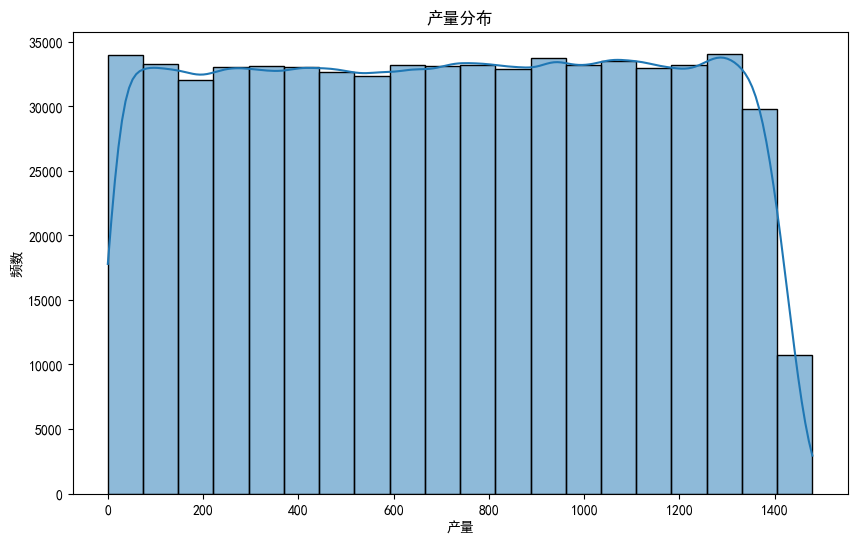

D:\100_APP\105_env\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\100_APP\105_env\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


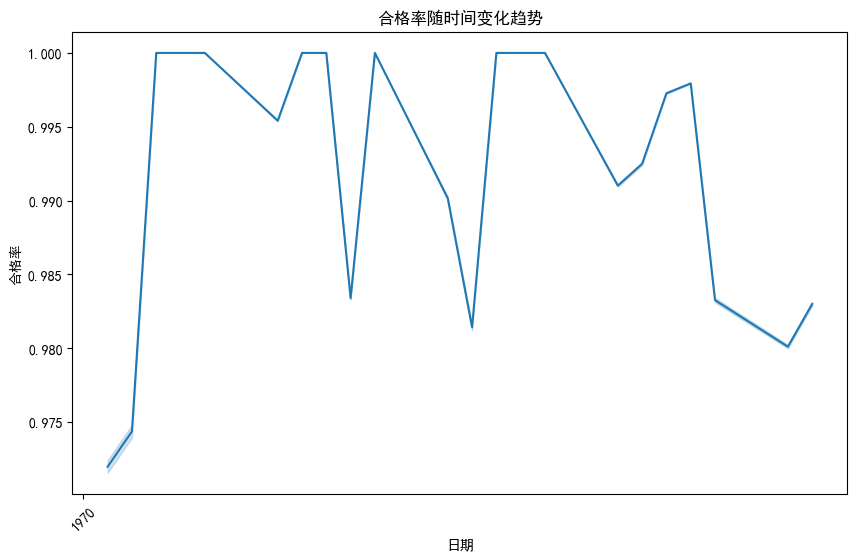

均方误差: 169878.08593114527


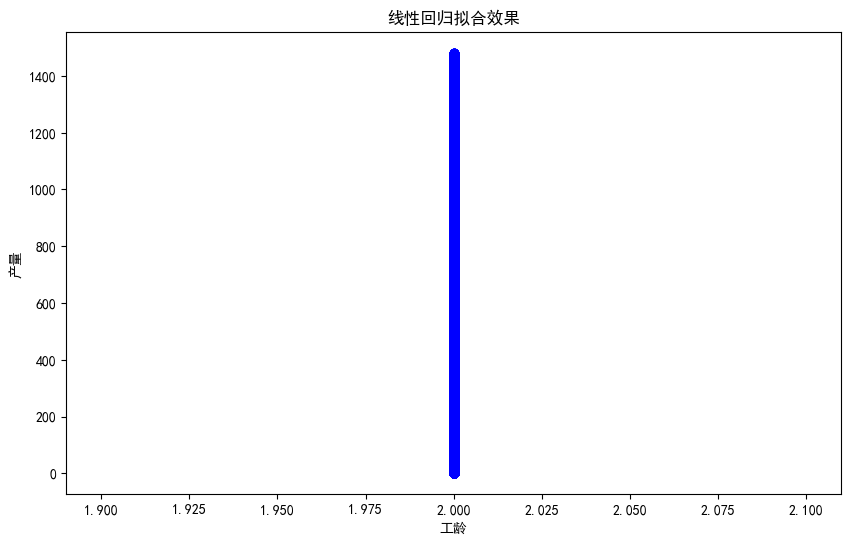

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 加载M301.csv数据和操作人员信息表
m301_data = pd.read_csv('./Datasets/附件3\M301.csv')
operator_info = pd.read_excel('./Datasets/附件3\操作人员信息表.xlsx')

# 合并操作人员信息到M301数据中
m301_data = pd.merge(m301_data, operator_info, on='生产线编号')

# 数据预处理
# 处理日期和时间字段
m301_data['日期'] = pd.to_datetime(m301_data['日期'])
m301_data['时间'] = pd.to_datetime(m301_data['时间'])

# 处理缺失值
m301_data.dropna(inplace=True)  # 删除含有缺失值的样本

# 特征工程
# 计算产量和合格率
m301_data['产量'] = m301_data['合格数'] + m301_data['不合格数']
m301_data['合格率'] = m301_data['合格数'] / m301_data['产量']

# 探索性数据分析（EDA）
# 产量分布可视化
plt.figure(figsize=(10, 6))
sns.histplot(m301_data['产量'], bins=20, kde=True)
plt.title('产量分布')
plt.xlabel('产量')
plt.ylabel('频数')
plt.show()

# 合格率随时间变化趋势可视化
plt.figure(figsize=(10, 6))
sns.lineplot(x='日期', y='合格率', data=m301_data)
plt.title('合格率随时间变化趋势')
plt.xlabel('日期')
plt.ylabel('合格率')
plt.xticks(rotation=45)
plt.show()

# 生产线、操作人员等因素与产量、合格率之间的关系分析
# 线性回归
X = m301_data[['工龄']]
y = m301_data['产量']

# 建立线性回归模型
model = LinearRegression()
model.fit(X, y)

# 模型评估
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("均方误差:", mse)

# 可视化模型拟合效果
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.title('线性回归拟合效果')
plt.xlabel('工龄')
plt.ylabel('产量')
plt.show()


In [13]:
import pandas as pd
import numpy as np

# 读取问题三中的操作人员信息表
operator_info = pd.read_excel(r'./Datasets/附件3\操作人员信息表.xlsx')

# 根据问题三中的工龄比例计算各个工龄段的操作人员数量
total_operators = 100  # 假设总操作人员数为100
age_ratios = [0.2, 0.3, 0.5]  # 假设工龄比例为20%、30%、50%
num_ages = [int(total_operators * ratio) for ratio in age_ratios]

# 定义班次时间
shifts = ['早班', '中班', '晚班']
shift_hours = [(8, 16), (16, 24), (0, 8)]

# 定义排班规则
shift_length = 8  # 每个班次工作时长为8小时
rest_days = 2  # 连休2天
working_days = 7 - rest_days  # 每周工作天数

# 初始化排班结果表
schedule = pd.DataFrame(columns=['操作人员编号', '工龄', '生产线编号', '班次'])

# 遍历工龄段，为每个工龄段的操作人员制定排班方案
for age, num_age in enumerate(num_ages):
    # 生成工龄段的操作人员编号列表
    age_operators = operator_info[operator_info['工龄'] == age + 1]['操作人员编号'].tolist()
    
    # 如果该工龄段没有操作人员，则跳过
    if len(age_operators) == 0:
        continue
    
    # 计算该工龄段的操作人员平均每班数量
    avg_operators_per_shift = int(np.ceil(num_age / (len(shifts) * working_days)))
    
    # 根据平均每班数量，为每个操作人员分配班次
    for operator_idx in range(num_age):
        operator_id = age_operators[operator_idx % len(age_operators)]
        for shift_idx, shift in enumerate(shifts):
            start_hour, end_hour = shift_hours[shift_idx]
            schedule = pd.concat([schedule, pd.DataFrame({'操作人员编号': [operator_id],
                                                           '工龄': [age + 1],
                                                           '生产线编号': ['M301'],  # 假设所有操作人员都在M301生产线工作
                                                           '班次': [f"{shift} {start_hour}:00-{end_hour}:00"]})],
                                 ignore_index=True)

schedule

,操作人员编号,工龄,生产线编号,班次
0,A001,2,M301,早班 8:00-16:00
1,A001,2,M301,中班 16:00-24:00
2,A001,2,M301,晚班 0:00-8:00
3,A001,2,M301,早班 8:00-16:00
4,A001,2,M301,中班 16:00-24:00
...,...,...,...,...
85,A001,2,M301,中班 16:00-24:00
86,A001,2,M301,晚班 0:00-8:00
87,A001,2,M301,早班 8:00-16:00
88,A001,2,M301,中班 16:00-24:00
